In [497]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
from datetime import datetime
from scipy import stats
import math
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid', color_codes = True)

In [498]:
ps = pd.read_csv('patch_seq_log_mouse.csv')

In [499]:
ps = ps[['Date', 'Slice (Lims ID?)', 'Post patch?', 'PCR cycles', 'SM_QC_PF', 'Bad dates']]
ps = ps[ps['PCR cycles'] == 21]
ps['Date'] = pd.to_datetime(ps['Date'], format = '%y%m%d')
ps = ps[ps['Bad dates'] != 'x']
ps = ps.drop('Bad dates', 1)
ps = ps[ps['SM_QC_PF'] != 'cnt']
ps.dropna(subset = ['Post patch?', 'SM_QC_PF'], inplace = True)
ps['Post patch?'] = ps['Post patch?'].astype('category')

In [500]:
ps.head()

,Date,Slice (Lims ID?),Post patch?,PCR cycles,SM_QC_PF
4717,2017-04-19,Sst-IRES-Cre;Ai14-313562.03.02,Outside-Out,21.0,fail
4718,2017-04-19,Sst-IRES-Cre;Ai14-313562.03.02,Outside-Out,21.0,pass
4719,2017-04-19,Sst-IRES-Cre;Ai14-313562.04.02,No-Seal,21.0,fail
4720,2017-04-19,Sst-IRES-Cre;Ai14-313562.04.02,Nucleated,21.0,pass
4721,2017-04-19,Sst-IRES-Cre;Ai14-313562.04.02,Outside-Out,21.0,pass


In [501]:
ps['Cre_line'] = ps['Slice (Lims ID?)'].str[:-17]
ps = ps.drop('Slice (Lims ID?)', 1)
ps

,Date,Post patch?,PCR cycles,SM_QC_PF,Cre_line
4717,2017-04-19,Outside-Out,21.0,fail,Sst-IRES-Cre;
4718,2017-04-19,Outside-Out,21.0,pass,Sst-IRES-Cre;
4719,2017-04-19,No-Seal,21.0,fail,Sst-IRES-Cre;
4720,2017-04-19,Nucleated,21.0,pass,Sst-IRES-Cre;
4721,2017-04-19,Outside-Out,21.0,pass,Sst-IRES-Cre;
4722,2017-04-19,Nucleated,21.0,pass,Sst-IRES-Cre;
4723,2017-04-19,No-Seal,21.0,pass,Sst-IRES-Cre;
4724,2017-04-19,Nucleated,21.0,pass,Sst-IRES-Cre;
4727,2017-04-19,No-Seal,21.0,fail,Sst-IRES-Cre;
4728,2017-04-19,No-Seal,21.0,pass,Sst-IRES-Cre;


In [502]:
ps0 = ps.drop('Post patch?', 1)
ps0 = ps.drop('PCR cycles', 1)
ps0 = ps.drop('SM_QC_PF', 1)

In [503]:
ps0.to_csv('cre_nuc.csv')

In [189]:
ps['Cre line'].value_counts()
#ps['Cre line'].sort_values()

Slc32a1-IRES-Cre;                    229
Gad2-IRES-Cre;                       195
Vip-IRES-Cre;                        168
Rbp4-Cre_KL100;                      117
Rorb-IRES2-Cre;                      110
Pvalb-IRES-Cre;                       93
Sst-IRES-Cre;                         70
Cux2-CreERT2;                         60
Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;     57
Rorb-IRES2-Cre-neo;                   51
Ctgf-T2A-dgCre;                       30
Chrna2-Cre_OE25;                      30
Scnn1a-Tg3-Cre;                       29
Chat-IRES-Cre-neo;                    27
Scnn1a-Tg2-Cre;                       22
Nr5a1-Cre;                            22
Htr3a-Cre_NO152;Pvalb-T2A-Dre;        16
Slc17a8-IRES2-Cre;                    15
Glt25d2-Cre_NF107;                    12
Ndnf-IRES2-dgCre;                      9
Nkx2-1-CreERT2;                        9
Oxtr-T2A-Cre;                          6
Vipr2-IRES2-Cre-neo;                   3
Rorb-IRES2-Cre;A                       2
Vipr2-IRES2-Cre;

In [190]:
ps.groupby(['Cre line'])['Post patch?'].value_counts()


Cre line                           Post patch?    
Chat-IRES-Cre-neo;                 No-Seal             10
                                   Partial-Nucleus      9
                                   Nucleated            5
                                   Entire-Cell          3
Chrna2-Cre_OE25;                   Nucleated           17
                                   No-Seal             10
                                   Outside-Out          2
                                   Partial-Nucleus      1
Ctgf-T2A-dgCre;                    No-Seal             15
                                   Nucleated           13
                                   Partial-Nucleus      2
Cux2-CreERT2;                      Nucleated           31
                                   No-Seal             21
                                   Partial-Nucleus      6
                                   Outside-Out          2
Gad2-IRES-Cre;                     Nucleated           85
                     

In [504]:
ps = ps.drop('Date', 1)
ps = ps.drop('PCR cycles', 1)
ps['post_patch'] = ps['SM_QC_PF']
ps = ps.drop('SM_QC_PF', 1)
#ps['total'] = ps['post_patch']
#ps.tail()

In [505]:
ps1 = ps.groupby(['Cre_line', 'Post patch?']).count()
ps1

post_patch
Cre_line                          Post patch?                
Chat-IRES-Cre-neo;                Entire-Cell             3.0
                                  No-Seal                10.0
                                  Nucleated               5.0
                                  Outside-Out             NaN
                                  Partial-Nucleus         9.0
                                  missing                 NaN
Chrna2-Cre_OE25;                  Entire-Cell             NaN
                                  No-Seal                10.0
                                  Nucleated              17.0
                                  Outside-Out             2.0
                                  Partial-Nucleus         1.0
                                  missing                 NaN
Ctgf-T2A-dgCre;                   Entire-Cell             NaN
                                  No-Seal                15.0
                                  Nucleated              13.0
                                  Outside-Out             NaN
                                  Partial-Nucleus         2.0
                                  missing                 NaN
Cux2-CreERT2;                     Entire-Cell             NaN
                                  No-Seal                21.0
                                  Nucleated              31.0
                                  Outside-Out             2.0
                                  Partial-Nucleus         6.0
                                  missing                 NaN
Gad2-IRES-Cre;                    Entire-Cell             1.0
                                  No-Seal                79.0
                                  Nucleated              85.0
                                  Outside-Out             6.0
                                  Partial-Nucleus        23.0
                                  missing                 1.0
...                                                       ...
Sst-IRES-Cre;                     Entire-Cell             NaN
                                  No-Seal                27.0
                                  Nucleated              26.0
                                  Outside-Out            11.0
                                  Partial-Nucleus         6.0
                                  missing                 NaN
Vip-IRES-Cre;                     Entire-Cell             2.0
                                  No-Seal                63.0
                                  Nucleated              76.0
                                  Outside-Out            13.0
                                  Partial-Nucleus        14.0
                                  missing                 NaN
Vipr2-IRES2-Cre-neo;              Entire-Cell             NaN
                                  No-Seal                 1.0
                                  Nucleated               2.0
                                  Outside-Out             NaN
                                  Partial-Nucleus         NaN
                                  missing                 NaN
Vipr2-IRES2-Cre;Pvalb-T2A-FlpO;   Entire-Cell             NaN
                                  No-Seal                 1.0
                                  Nucleated               NaN
                                  Outside-Out             NaN
                                  Partial-Nucleus         1.0
                                  missing                 NaN
Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO; Entire-Cell             2.0
                                  No-Seal                23.0
                                  Nucleated              16.0
                                  Outside-Out             1.0
                                  Partial-Nucleus        15.0
                                  missing                 NaN

[144 rows x 1 columns]

In [506]:
type(ps1)

pandas.core.frame.DataFrame

In [507]:
ps1 = ps1.add_suffix('_count').reset_index()
ps1

,Cre_line,Post patch?,post_patch_count
0,Chat-IRES-Cre-neo;,Entire-Cell,3.0
1,Chat-IRES-Cre-neo;,No-Seal,10.0
2,Chat-IRES-Cre-neo;,Nucleated,5.0
3,Chat-IRES-Cre-neo;,Outside-Out,NaN
4,Chat-IRES-Cre-neo;,Partial-Nucleus,9.0
5,Chat-IRES-Cre-neo;,missing,NaN
6,Chrna2-Cre_OE25;,Entire-Cell,NaN
7,Chrna2-Cre_OE25;,No-Seal,10.0
8,Chrna2-Cre_OE25;,Nucleated,17.0
9,Chrna2-Cre_OE25;,Outside-Out,2.0


In [508]:
ps1['post_patch_count'] = ps1['post_patch_count'].fillna(0)
#ps1['total_count'] = ps1['total_count'].fillna(0)
ps1
#ps1.groupby(['Cre line', 'Post patch?']).agg({'total_count': 'sum'})

,Cre_line,Post patch?,post_patch_count
0,Chat-IRES-Cre-neo;,Entire-Cell,3.0
1,Chat-IRES-Cre-neo;,No-Seal,10.0
2,Chat-IRES-Cre-neo;,Nucleated,5.0
3,Chat-IRES-Cre-neo;,Outside-Out,0.0
4,Chat-IRES-Cre-neo;,Partial-Nucleus,9.0
5,Chat-IRES-Cre-neo;,missing,0.0
6,Chrna2-Cre_OE25;,Entire-Cell,0.0
7,Chrna2-Cre_OE25;,No-Seal,10.0
8,Chrna2-Cre_OE25;,Nucleated,17.0
9,Chrna2-Cre_OE25;,Outside-Out,2.0


In [509]:
type(ps1)

pandas.core.frame.DataFrame

In [510]:
ps_totals = ps1.groupby(['Cre_line', 'Post patch?']).agg({'post_patch_count': 'sum'})
ps2 = ps1.groupby(['Cre_line']).agg({'post_patch_count': 'sum'})
ps_final = ps_totals.div(ps2, level = 'Cre_line') * 100

In [511]:
ps_final = ps_final.reset_index()

In [512]:
ps_final

,Cre_line,Post patch?,post_patch_count
0,Chat-IRES-Cre-neo;,Entire-Cell,11.111111
1,Chat-IRES-Cre-neo;,No-Seal,37.037037
2,Chat-IRES-Cre-neo;,Nucleated,18.518519
3,Chat-IRES-Cre-neo;,Outside-Out,0.000000
4,Chat-IRES-Cre-neo;,Partial-Nucleus,33.333333
5,Chat-IRES-Cre-neo;,missing,0.000000
6,Chrna2-Cre_OE25;,Entire-Cell,0.000000
7,Chrna2-Cre_OE25;,No-Seal,33.333333
8,Chrna2-Cre_OE25;,Nucleated,56.666667
9,Chrna2-Cre_OE25;,Outside-Out,6.666667


In [513]:
ps_nucleated = ps_final[ps_final['Post patch?'] == 'Nucleated']
ps_nucleated['pct_nuc'] = ps_nucleated['post_patch_count']
ps_nucleated = ps_nucleated.drop('post_patch_count', 1)
ps_nucleated = ps_nucleated.drop('Post patch?', 1)
ps_nucleated

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Cre_line,pct_nuc
2,Chat-IRES-Cre-neo;,18.518519
8,Chrna2-Cre_OE25;,56.666667
14,Ctgf-T2A-dgCre;,43.333333
20,Cux2-CreERT2;,51.666667
26,Gad2-IRES-Cre;,43.589744
32,Glt25d2-Cre_NF107;,66.666667
38,Htr3a-Cre_NO152;Pvalb-T2A-Dre;,56.250000
44,Ndnf-IRES2-dgCre;,55.555556
50,Nkx2-1-CreERT2;,44.444444
56,Nr5a1-Cre;,39.130435


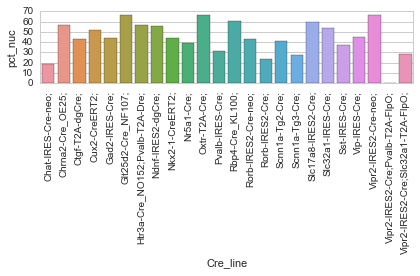

In [515]:
cre_nuc = sns.barplot(x = 'Cre_line', y = 'pct_nuc', data = ps_nucleated)
for item in cre_nuc.get_xticklabels():
    item.set_rotation(90)
#plt.setp(cre_nuc.get_xticklabels(), rotation=90)
#plt.tight_layout()
#plt.subplots_adjust(bottom=0.15)
plt.savefig('cre_line_vs_pct_nuc',dpi=100)

In [517]:
ps2 = ps2.reset_index()
ps2
ps2.to_csv('cre_line_totals.csv')